In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = '/home/data/data.npy'
label_path = '/home/data/labels.npy'

data = np.load(data_path)
labels = np.load(label_path)

In [3]:
np.unique(labels)

array([0, 1])

In [4]:
data.shape

(66760, 21, 2)

In [5]:
vv_array = data[:, :, 0].ravel()
vh_array = data[:, :, 1].ravel()

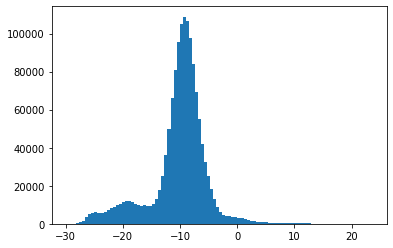

In [6]:
plt.hist(vv_array, bins=100);

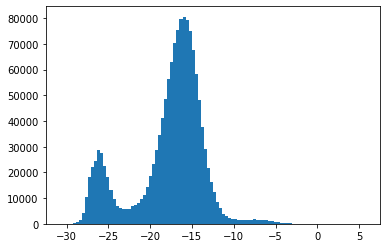

In [22]:
plt.hist(vh_array, bins=100);

In [38]:
vv_array_inv = 10**(vv_array/10)
vh_array_inv = 10**(vh_array/10)

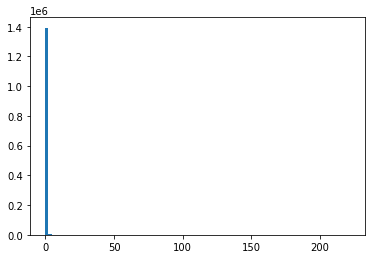

In [41]:
plt.hist(vv_array_inv, bins=100);
plt.xlim([])

In [42]:
np.mean(vv_array_inv), np.min(vv_array_inv), np.max(vv_array_inv)

(0.20757239, 0.0010607257, 221.60747)

In [43]:
np.mean(vh_array_inv), np.min(vh_array_inv), np.max(vh_array_inv)

(0.025234245, 0.0008538221, 3.7317924)

In [44]:
np.mean(vv_array)

-10.238984

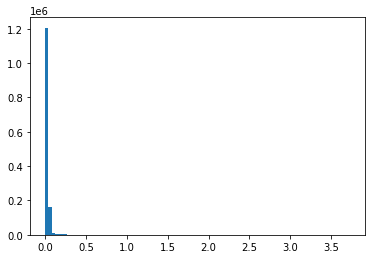

In [45]:
plt.hist(vh_array_inv, bins=100);

In [8]:
data.shape, labels.shape

((66760, 21, 2), (66760,))

In [34]:
data[labels==1, :, 0].T.shape

(21, 32707)

In [45]:
def get_mean_confidence(data, conf_upper, conf_lower):
    """
    Args:
        data (numpy.array): dimensions should be (time, length)
    
    Returns:
        mean, upper, lower (tuple): returns a tuple of numpy.array objects
    """
    return np.median(data, axis=1), np.mean(data, axis=1), np.percentile(data, conf_upper, axis=1), np.percentile(data, conf_lower, axis=1)

In [58]:
vv_median, vv_mean, vv_upper, vv_lower = get_mean_confidence(data[labels==1, :, 1].T, 100, 0)
# vh_mean, vh_upper, vh_lower = get_mean_confidence(data[labels==1,...], 95, 5)

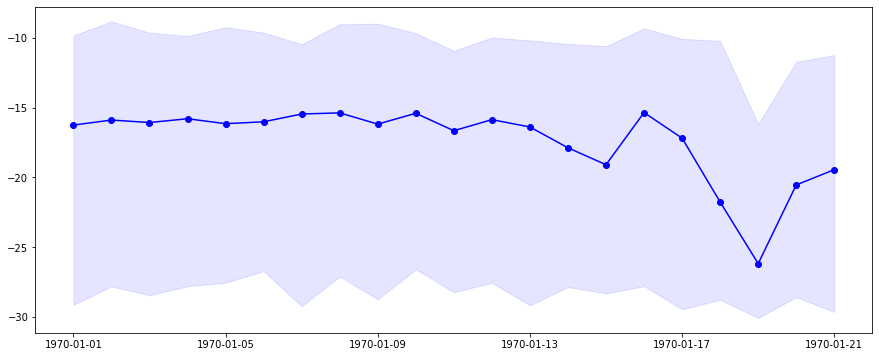

In [59]:
# plot time series
fig, ax = plt.subplots(figsize=(15, 6))

# flood
p1 = ax.plot_date(np.arange(21), vv_median, '-bo'); # plot mean
p2 = ax.fill_between(np.arange(21), vv_upper, vv_lower, alpha=0.1, color='b'); # plot confidence intervals
# no flood
# ax.plot_date(eop_image.timestamp[:-2], vh_mean, '-ro', xdate=True, ydate=False);
# ax.fill_between(eop_image.timestamp[:-2], vh_upper, vh_lower, alpha=0.1, color='r');

# ax.legend(['Flood average', 'No Flood average', 'Flood std', 'No Flood std'], loc='upper left')
# ax.tick_params('x', rotation=45)
# ax.set_ylabel(r'VV $\sigma_0$ [dB]', fontsize=15)
# ax.set_title('Time Series of annotated data', fontsize=23)
# ax.grid();
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))

In [32]:
vv_mean.shape

(32707,)